In [1]:
import sys
if '..' not in sys.path:
    sys.path.append('..')

In [2]:
from tfyolo3.dataloaders import common
from tfyolo3.helpers import draw
from tfyolo3 import YoloV3
from tfyolo3 import layers
from pathlib import Path
import numpy as np
import tensorflow as tf
import math
import numpy as np
from matplotlib import patches
import matplotlib.pyplot as plt

The classes contained in the dataset

In [3]:
classes = common.load_classes('../model_data/coco_classes.txt', True)
print(classes)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorbike', 4: 'aeroplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'sofa', 58: 'pottedplant', 59: 'bed', 60: 'diningtable', 61: 'toilet', 62: 'tvmonitor', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'mi

In [4]:
target_shape = (608, 608, 3)
batch_size = 4
# grid_len = 8
is_training = True
max_objects = 10
num_classes = len(classes)

In [5]:
model = YoloV3(target_shape, max_objects,
               num_classes=num_classes, training=False)

load default weights from [Yolo](https://pjreddie.com/darknet/yolo/)

In [6]:
w_path = Path('./yolov3.weights')
model.load_weights(w_path)

loaded checkopoint from /Users/fumarolaf/git/tfyolo3/notebooks/yolov3.weights
version major 0, minor 2, revision 0, seen 32013312


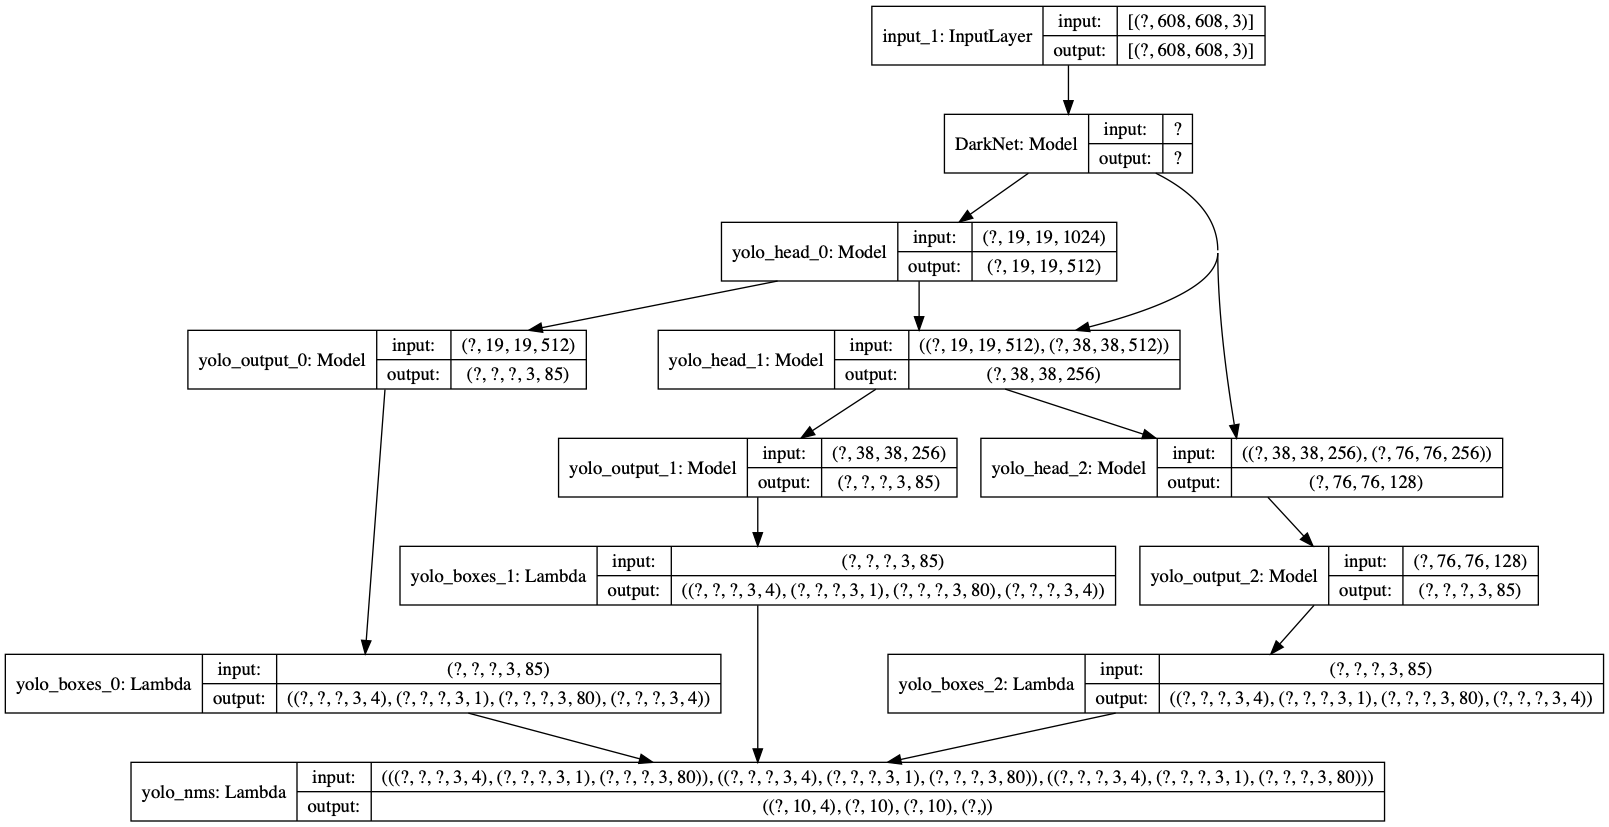

In [7]:
tf.keras.utils.plot_model(model.model, show_shapes=True)

In [8]:
img = common.open_image('./test.jpg')
img_pad = common.pad_to_fixed_size(img, target_shape)
img_resized = common.resize(img, target_shape)
x = np.divide(img_pad, 255.)
x = np.expand_dims(x, 0)
x.shape

(1, 608, 608, 3)

In [9]:
boxes, scores, classes, sel = model.model.predict(x)

In [10]:
boxes[:,:sel[0],:]

array([[[382., 146., 559., 253.],
        [203., 147., 323., 249.],
        [320., 153., 413., 237.],
        [514., 143., 608., 246.],
        [102.,  77., 211., 282.],
        [ 60.,  55., 174., 226.],
        [295., 157., 333., 218.],
        [ 54., 153.,  79., 213.],
        [380., 151., 505., 248.]]], dtype=float32)

In [11]:
scores

array([[0.9993706 , 0.9987242 , 0.9943919 , 0.9338671 , 0.9096555 ,
        0.86551315, 0.863458  , 0.8561664 , 0.78017753, 0.        ]],
      dtype=float32)

In [12]:
classes

array([[2., 2., 2., 2., 0., 7., 2., 2., 2., 0.]], dtype=float32)

In [13]:
sel

array([9], dtype=int32)

In [14]:
class_names = Path('../model_data/coco_classes.txt')\
    .read_text().splitlines()
class_names_dict = dict(enumerate(class_names))

car 0.9993706
car 0.9987242
car 0.9943919
car 0.9338671
person 0.9096555
truck 0.86551315
car 0.863458
car 0.8561664
car 0.78017753


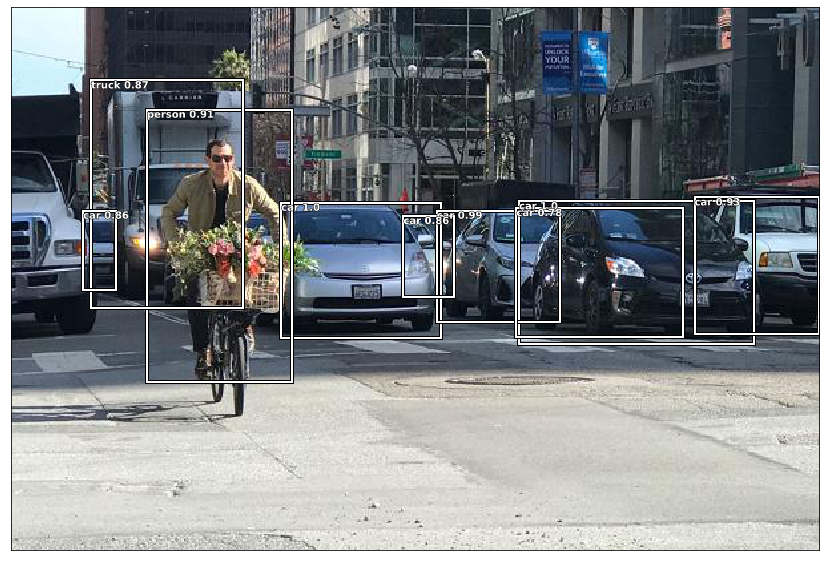

In [15]:
ax = draw.show_img(img_resized, figsize=(16,10))
for i,b in enumerate(boxes[0,:sel[0]]):
    draw.rect(ax, b)
    draw.text(ax, b[:2], class_names_dict[classes[0, i]] + ' ' + str(round(scores[0,i],2)), sz=10)
    print(class_names_dict[classes[0, i]], scores[0,i])
    
plt.show()